In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Reading the Dataset
main = pd.read_csv(r"C:\Users\ASUS\Desktop\aiml\maintenance_data.csv")
main

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [15]:
#Data cleaning
main.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

In [16]:
main.dtypes

lifetime            int64
broken              int64
pressureInd       float64
moistureInd       float64
temperatureInd    float64
team               object
provider           object
dtype: object

In [17]:
main.columns

Index(['lifetime', 'broken', 'pressureInd', 'moistureInd', 'temperatureInd',
       'team', 'provider'],
      dtype='object')

In [18]:
import warnings
warnings.filterwarnings('ignore')

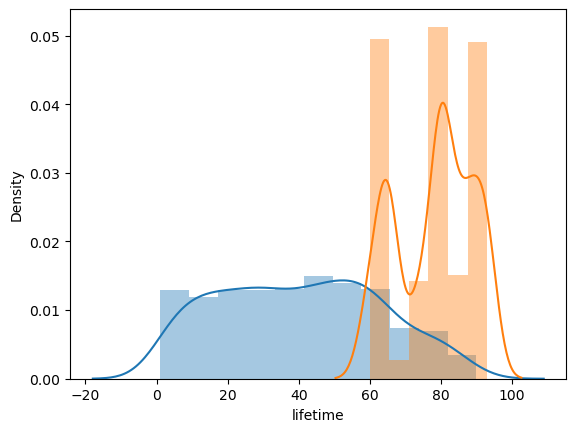

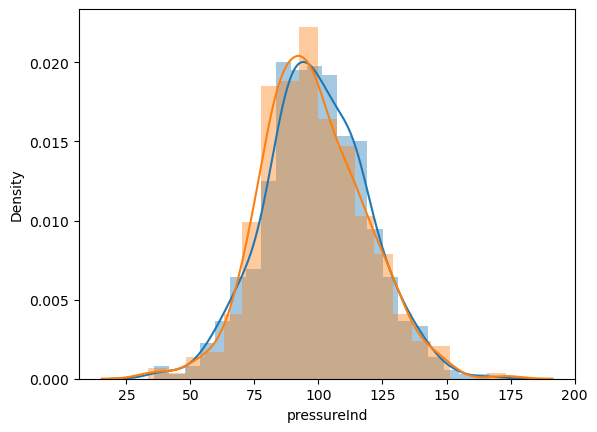

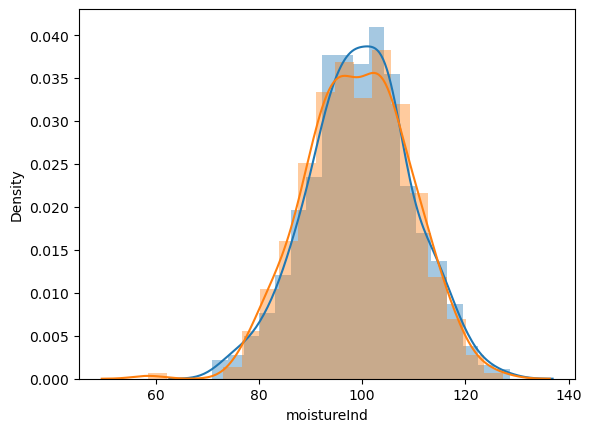

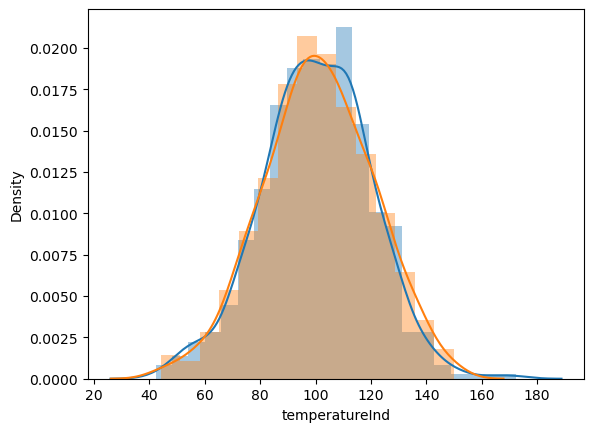

In [21]:
for i in ['lifetime','pressureInd','moistureInd','temperatureInd']:
    sns.distplot(main[i][main.broken==0])
    sns.distplot(main[i][main.broken==1])
    plt.show()

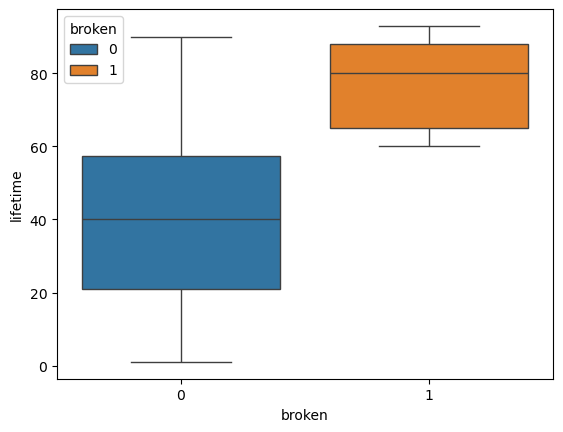

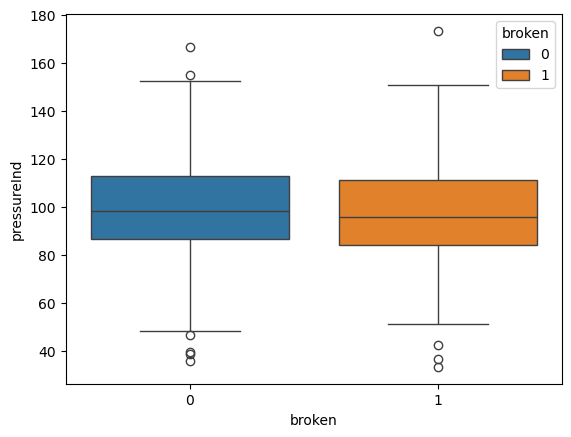

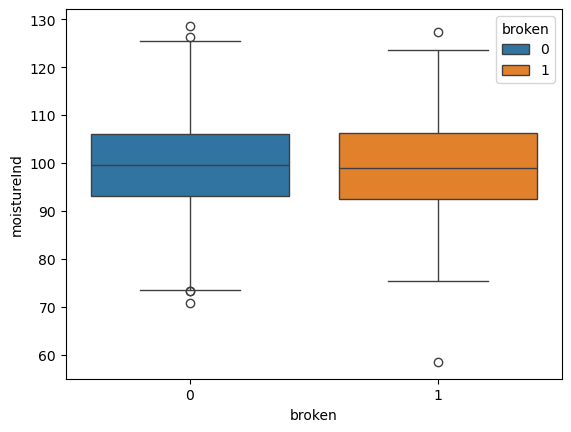

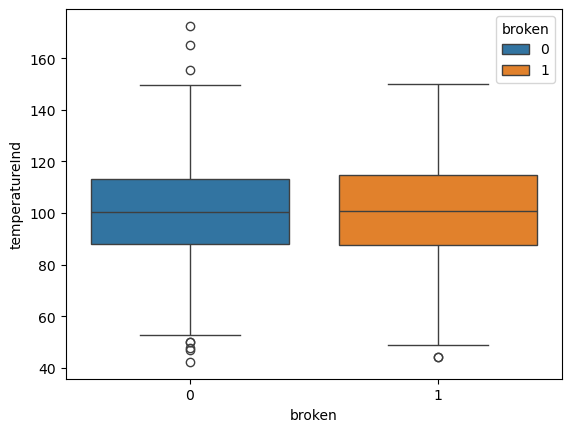

In [24]:
for i in ['lifetime','pressureInd','moistureInd','temperatureInd']:
    sns.boxplot(x=main.broken,y=main[i],hue=main.broken)
    plt.show()

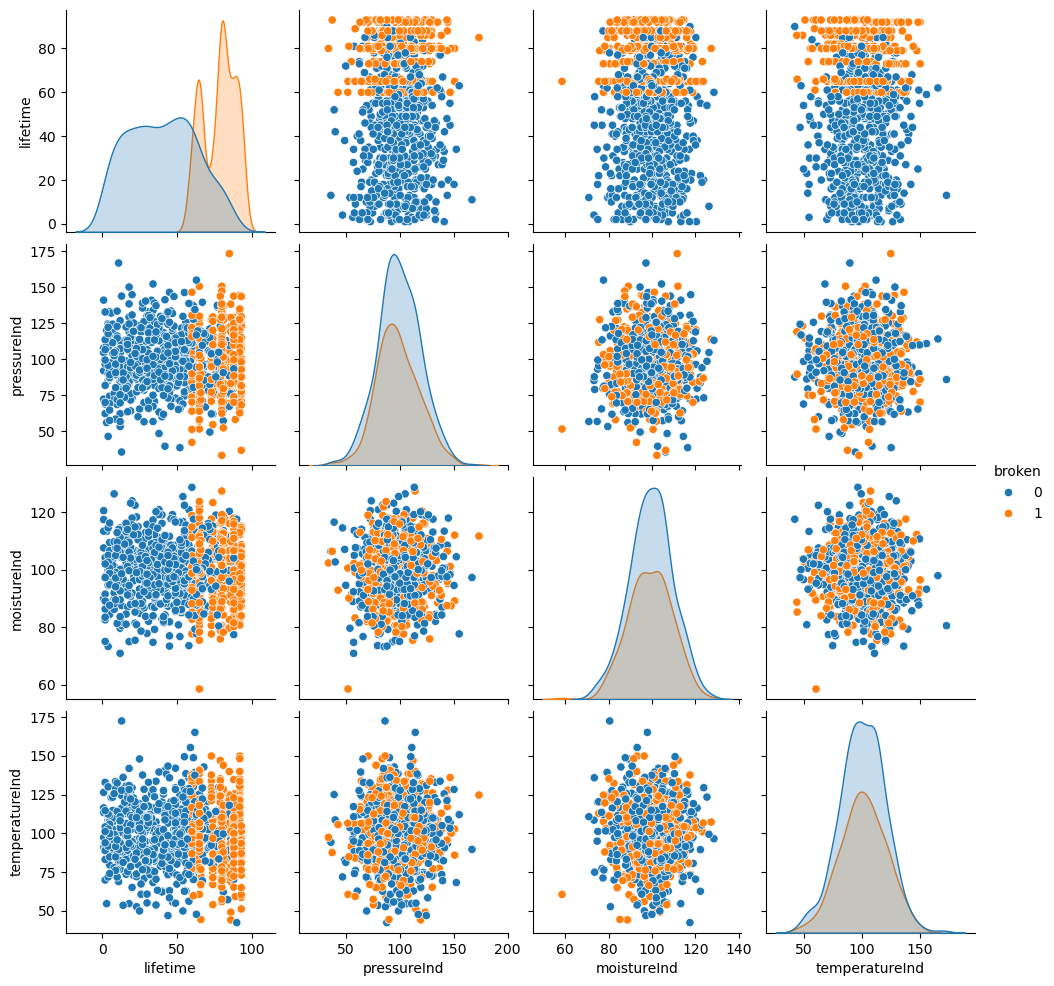

In [25]:
sns.pairplot(main,hue='broken')
plt.show()

In [26]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
main.team = le.fit_transform(main.team)
main.team.unique()

array([0, 2, 1])

In [28]:
le.inverse_transform([0, 2, 1])

array(['TeamA', 'TeamC', 'TeamB'], dtype=object)

In [29]:
main.provider = le.fit_transform(main.provider)
main.provider.unique()

array([3, 0, 1, 2])

In [30]:
le.inverse_transform([3, 0, 1, 2])

array(['Provider4', 'Provider1', 'Provider2', 'Provider3'], dtype=object)

In [31]:
c = main.corr()
c

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
lifetime,1.000000,0.702656,0.000943,0.001196,0.001744,-0.046537,-0.025172
broken,0.702656,1.000000,-0.028942,-0.019520,0.015364,0.030876,-0.062972
pressureInd,0.000943,-0.028942,1.000000,0.020543,0.003641,-0.069528,-0.004337
moistureInd,0.001196,-0.019520,0.020543,1.000000,-0.009842,0.022420,0.028906
temperatureInd,0.001744,0.015364,0.003641,-0.009842,1.000000,0.007310,-0.010822
team,-0.046537,0.030876,-0.069528,0.022420,0.007310,1.000000,0.005606
provider,-0.025172,-0.062972,-0.004337,0.028906,-0.010822,0.005606,1.000000


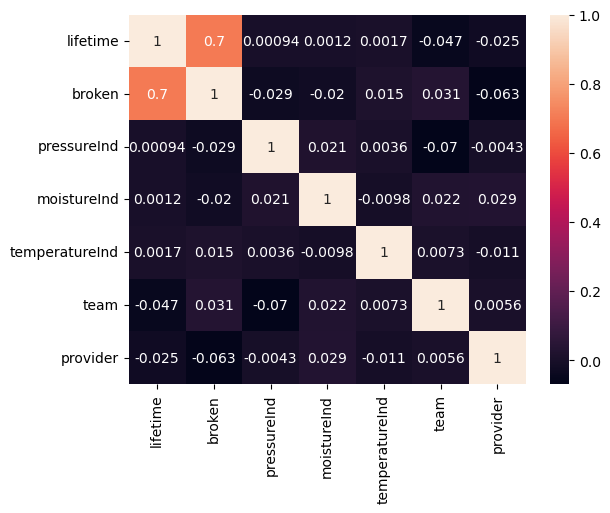

In [32]:
sns.heatmap(c,annot=True)
plt.show()

In [33]:
#ip/op creation
ip=main.drop('lifetime',axis=1)
op=main.lifetime

In [34]:
ip.head()

,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,0,92.178854,104.230204,96.517159,0,3
1,1,72.075938,103.065701,87.271062,2,3
2,0,96.272254,77.801376,112.196170,0,0
3,1,94.406461,108.493608,72.025374,2,1
4,0,97.752899,99.413492,103.756271,1,0


In [35]:
op.head()

0    56
1    81
2    60
3    86
4    34
Name: lifetime, dtype: int64

In [36]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2, random_state=23)

In [37]:
x_train

,broken,pressureInd,moistureInd,temperatureInd,team,provider
228,0,105.038295,93.953239,120.490000,2,3
45,0,83.068571,104.160710,124.362915,2,0
373,0,100.777048,86.189978,93.774378,0,3
813,1,114.224092,92.574385,81.395971,1,0
448,0,116.984076,85.835684,104.986986,1,3
...,...,...,...,...,...,...
950,0,80.199027,108.449486,96.285473,0,2
969,0,143.550338,97.505866,121.110584,2,0
40,1,84.344066,103.377052,113.275459,0,0
742,0,80.447947,87.761084,112.608885,2,3


In [38]:
x_test

,broken,pressureInd,moistureInd,temperatureInd,team,provider
519,0,86.070644,104.915031,137.606155,0,1
837,0,87.414071,94.774535,97.782089,1,2
208,0,91.637760,116.734086,125.553106,2,3
525,0,76.314017,96.530143,77.806579,2,2
978,1,102.776756,111.451780,112.955770,0,2
...,...,...,...,...,...,...
647,1,68.831804,100.007590,77.625465,1,2
481,0,70.959022,91.056107,83.545443,1,1
134,0,93.911405,106.036413,112.541860,0,1
366,1,58.282404,99.043860,59.183754,0,3


In [39]:
y_train

228    50
45     13
373     8
813    80
448    53
       ..
950    27
969    48
40     80
742    24
595    78
Name: lifetime, Length: 800, dtype: int64

In [40]:
y_test

519    27
837     5
208    54
525     8
978    65
       ..
647    65
481    35
134    17
366    89
879    45
Name: lifetime, Length: 200, dtype: int64

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 6)
(200, 6)
(800,)
(200,)


In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [43]:
# Machine Learning Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
# Prediction
pred = lr.predict(x_test)
pred

array([44.79900504, 43.36901843, 43.52353231, 41.57109126, 86.61160788,
       40.63549624, 43.56693811, 42.66121542, 82.48205156, 46.15886064,
       43.01601342, 43.10920784, 46.37081277, 43.32350717, 45.6944572 ,
       82.94808089, 43.62779028, 42.69146139, 46.23809066, 43.31518539,
       45.85037421, 43.00518331, 43.53133449, 44.16132362, 86.41060827,
       45.0870872 , 85.11179953, 42.00139995, 44.05630972, 46.16466731,
       84.53893049, 44.68831071, 83.93311135, 85.11287553, 83.08502391,
       40.92895398, 44.26689159, 45.53468381, 41.27907918, 40.36940608,
       44.78843147, 84.39500469, 42.46732932, 42.11376426, 45.76958471,
       42.7384491 , 84.31935574, 43.58365544, 82.63468365, 41.76189771,
       45.43570636, 84.05137198, 82.53476892, 42.83079834, 83.30204681,
       40.35370287, 44.81871482, 83.21111286, 42.35440364, 40.8501798 ,
       85.38121661, 41.74368443, 42.96650952, 44.55194705, 43.2138413 ,
       85.13289297, 83.87788061, 87.47078344, 44.96866769, 83.81